# Sorting Algorithms Demostration

### Kai Zhang, Columbia University, 2018

In [1]:
import random
import time
import math
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# if 'maximum recursion depth exceeded in comparison' occurs for quick sort
# dangerous
import resource, sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(10**6)
print(sys.getrecursionlimit())
#resource.setrlimit(resource.RLIMIT_STACK, (resource.RLIM_INFINITY, resource.RLIM_INFINITY))

1000000
1000000


In [2]:
class Heap:
    
    def Parent(self, i): 
        """
        i = 0, 1, ..., heapsize-1
        """
        return math.floor((i-1)/2)
    
    def LeftChild(self, i):
        return 2*i + 1
    
    def RightChild(self, i):
        return 2*i + 2
    
    def HeapMax(self,A):
        return A[0]
    
    def MaxHeapify(self, A, heapsize, i):
        """
        float down element at node i
        to the heap, recurrently
        until reaching a max-heap
        """
        l = self.LeftChild(i) 
        r = self.RightChild(i)
        if l < heapsize and A[l] > A[i]:
            largest = l
        else:
            largest = i
            
        if r < heapsize and A[r] > A[largest]:
            largest = r
        
        if largest != i:
            key = A[i]
            A[i] = A[largest]
            A[largest] = key
            self.MaxHeapify(A, heapsize, largest)
        
        return A
    
    def BuildMaxHeap(self, A, heapsize):
        n = heapsize # <= len(A)
        for i in range(math.floor(n/2)-1, -1, -1):
            self.MaxHeapify(A, heapsize, i)
        
        return A
    
    
    def HeapExtractMax(self, A, heapsize):
        
        if heapsize < 1:
            print("error: heap underflow")
        maximum = self.HeapMax(A)
        A[0] = A[heapsize-1]
        heapsize = heapsize - 1
        self.MaxHeapify(A, heapsize, 0)
        A = A[:heapsize] # trim list

        return maximum, A, heapsize
    
    def HeapIncreaseKey(self, A, i, key):
        """
        increase site i's key to a larger value
        and rearrange the heap accordingly
        """
        if key < A[i]:
            print("error: new key is smaller than current key")
            
        A[i] = key
        
        while (i>0 and A[self.Parent(i)] < A[i]):
            temp = A[i]
            A[i] = A[self.Parent(i)]
            A[self.Parent(i)] = temp
            i = self.Parent(i)
        
        return A
    
    def MaxHeapInsert(self, A, heapsize, key):
        Infy = 1e8
        heapsize = heapsize + 1
        A.append(-Infy)
        self.HeapIncreaseKey(A, heapsize-1, key)
        
        return A, heapsize
        

In [108]:
#X = [4,1,3,2,16,9,10,14,8,7]
X = [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1]
print("original: ", X)
hp = Heap()
X = hp.BuildMaxHeap(X)
print("heap ", X)

#n = len(X)
#k = 10
#X, n = hp.MaxHeapInsert(X, n, k)
#print("insert key ", k, " to get heap ", X, " of size ", n)

#i, k = 8, 15
#X = hp.HeapIncreaseKey(X, i, k)
#print("heap increase site ", i," to key ", k,  X)

n = len(X)
xmax, X, n = hp.HeapExtractMax(X, n)
print("heap after extract maximum ", xmax, X, "of size", n)

original:  [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1]
heap  [15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1]
heap after extract maximum  15 [13, 12, 9, 5, 6, 8, 7, 4, 0, 1, 2] of size 11


In [36]:
class Sort:
    #def __int__(self, A):
    #    self.A = A
        
    def InsertionSort(self, A):
        """
        type A: a list 
        return : a sorted list A
        sorted in place
        """
        for j in range(1,len(A)):
            key = A[j]
            i = j-1
            while (i>=0 and A[i]>key):
                A[i+1] = A[i]
                i = i-1
            A[i+1] = key
        return A
    
    def BubbleSort(self, A):
        for i in range(0,len(A)): # from first to last
            for j in range(len(A)-1, i, -1): # from last to i+1
                if A[j] < A[j-1]:
                    key = A[j]
                    A[j]= A[j-1]
                    A[j-1] = key
        return A
    
    def Merge(self, A, p, q, r): # p <= q < r
        n1 = q - p + 1
        n2 = r - q
        Inf = 1e8
        
        L = [] # or L = [None]*len(A)
        for i in range(0, n1):         
            L.append(A[p+i]) # or L[i] = A[p+i]
                    
        R = [] # or R = [None]*len(A)
        for j in range(0, n2):           
            R.append(A[q+j+1]) # or R[j] = A[q+j+1]
                    
        L.append(Inf) # or L[n1], R[n2] = Inf, Inf
        R.append(Inf)
        i,j = 0,0 
        
        for k in range(p, r+1):
            if L[i] <= R[j]:
                A[k] = L[i]
                i = i+1
            else:
                A[k] = R[j]
                j = j+1
    
        return L, R, A
    
    def MergeSort(self, A, p, r):
        if p < r:
            q = math.floor((p+r)/2)
            self.MergeSort(A, p, q)
            self.MergeSort(A, q+1, r)
            self.Merge(A, p, q, r)
            
        return A
    
    def HeapSort(self, A):
        heapsize = len(A)
        Heap().BuildMaxHeap(A, heapsize)
              
        for i in range(len(A)-1, 0, -1):
            key = A[0]
            A[0] = A[i]
            A[i] = key
            heapsize = heapsize - 1
            Heap().MaxHeapify(A, heapsize, 0)
            
        return A
    
    def Partition(self, A, p, r): # [p, r)
        x = A[r-1]
        i = p - 1
        
        for j in range(p, r-1):
            if A[j] <= x:
                i = i + 1
                key = A[i]
                A[i] = A[j]
                A[j] = key
        
        key = A[i+1]
        A[i+1] = A[r-1]
        A[r-1] = key
        
        return i+1
    
    def QuickSort(self, A, p, r):
        if p < r-1:
            q = self.Partition(A, p, r)
            self.QuickSort(A, p, q)
            self.QuickSort(A, q+1, r)
            
        return A
    
    
    def QuickSort2(self, A, p, r):
        """
        tail recursion
        """
        if p < r-1:
            q = self.Partition(A, p, r)
            self.QuickSort(A, p, q)
            p = q + 1
            
        return A
    
    def CountingSort(self, A, k):
        """sort n integers in the range 0, 1, ..., k-1"""
        C = [0] * k
        B = [None] * len(A)
        
        for j in range(0, len(A)):
            C[A[j]] = C[A[j]] + 1
                
        for i in range(1, k):
            C[i] = C[i] + C[i-1]

        for j in range(len(A)-1, -1, -1): # n-1, ..., 1, 0
            B[C[A[j]]-1] = A[j]
            C[A[j]] = C[A[j]] - 1
        
        return B

In [52]:
n=20
X = list(range(0,n))
random.seed(1984)
random.shuffle(X)
#X = [2, 5, 3, 0, 2, 3, 0, 3]
#A = list(range(n,0,-1)) # reverse order
print(X)

[2, 5, 19, 16, 8, 7, 12, 0, 4, 3, 1, 18, 17, 14, 13, 6, 9, 10, 15, 11]


In [53]:
st=Sort() # create object 'st' using class 'Sort'
tic = time.time()
Xst = st.CountingSort(X, n)
toc = time.time()
print("Counting sort: " + str(1000*(toc-tic)) + " ms")
print(Xst)

Counting sort: 0.141143798828125 ms
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [54]:
st=Sort() # create object 'st' using class 'Sort'
tic = time.time()
st.InsertionSort(X)
toc = time.time()
print("Insertion sort: " + str(1000*(toc-tic)) + " ms")
#print(X)

Insertion sort: 0.09918212890625 ms


In [55]:
st=Sort() # create object 'st' using class 'Sort'
tic = time.time()
st.BubbleSort(X)
toc = time.time()
print("Bubble sort: " + str(1000*(toc-tic)) + " ms")
#print(X)

Bubble sort: 0.13494491577148438 ms


In [56]:
A = [8,8,8,8,8,8,8,8,10,2,4,5,7,1,2,3,6,10,8,8,8,8,8,8]
st=Sort()
L, R, A = st.Merge(A, 9, 12, 16)
print(L)
print(R)
print(A)

[2, 4, 5, 7, 100000000.0]
[1, 2, 3, 6, 100000000.0]
[8, 8, 8, 8, 8, 8, 8, 8, 10, 1, 2, 2, 3, 4, 5, 6, 7, 10, 8, 8, 8, 8, 8, 8]


In [57]:
st=Sort() # create object 'st' using class 'Sort'
tic = time.time()
st.MergeSort(X, 0, len(X)-1)
toc = time.time()
print("Merge sort: " + str(1000*(toc-tic)) + " ms")
#print(X)

Merge sort: 0.19812583923339844 ms


In [58]:
st=Sort() # create object 'st' using class 'Sort'
tic = time.time()
st.HeapSort(X)
toc = time.time()
print("Heap sort: " + str(1000*(toc-tic)) + " ms")
print(X)

Heap sort: 0.18978118896484375 ms
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [59]:
# ~ O(n^2) for unbalanced partition, e.g. X = [1, 2, 3, 4, ... , n]
st=Sort() # create object 'st' using class 'Sort'
tic = time.time()
st.QuickSort(X, 0, len(X))
toc = time.time()
print("Quick sort: " + str(1000*(toc-tic)) + " ms")
print(X)

Quick sort: 0.3330707550048828 ms
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [60]:
# ~ O(n^2) for unbalanced partition, e.g. X = [1, 2, 3, 4, ... , n]
st=Sort() # create object 'st' using class 'Sort'
tic = time.time()
st.QuickSort2(X, 0, len(X))
toc = time.time()
print("Quick sort2: " + str(1000*(toc-tic)) + " ms")
print(X)

Quick sort2: 0.18095970153808594 ms
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [61]:
st=Sort() # create object 'st' using class 'Sort'
tic = time.time()
Xst = st.CountingSort(X, n)
toc = time.time()
print("Counting sort: " + str(1000*(toc-tic)) + " ms")
print(Xst)

Counting sort: 0.09584426879882812 ms
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


# Sorting Algorithm Benckmark

In [49]:
nlist = [10, 30, 100, 300, 1000, 3000, 10000] #, 30000, 100000] # n = 10^5 bubble sort takes ~15mins

t1 = []
t2 = []
t3 = []
t4 = []
t5 = []
t6 = []
t7 = []

tol = 1e-8
for n in nlist:
    X = list(range(0,n))
    Xsorted = list(X) # do not use Xnew = Xold, for this results in the SAME one list
    random.seed(1984)
    random.shuffle(X)
    X0 = list(X)
    st=Sort() # create object 'st' using class 'Sort'
    print("n = ", n)

    X = list(X0)
    tic = time.time()
    st.InsertionSort(X)
    toc = time.time()
    t1.append(1000*(toc-tic))
    print("Insertion sort: " + str(1000*(toc-tic)) + " ms")
    dX = [x1 - x2 for x1, x2 in zip(Xsorted, X)]
    if sum(dX) > tol: print('sorting error: ', dX)
    
    X = list(X0)
    tic = time.time()
    st.BubbleSort(X)
    toc = time.time()
    t2.append(1000*(toc-tic))
    print("Bubble sort: " + str(1000*(toc-tic)) + " ms")
    dX = [x1 - x2 for x1, x2 in zip(Xsorted, X)]
    if sum(dX) > tol: print('sorting error: ', dX)
  
    X = list(X0)
    tic = time.time()
    st.MergeSort(X, 0, len(X)-1)
    toc = time.time()
    t3.append(1000*(toc-tic))
    print("Merge sort: " + str(1000*(toc-tic)) + " ms")
    dX = [x1 - x2 for x1, x2 in zip(Xsorted, X)]
    if sum(dX) > tol: print('sorting error: ', dX)
         
    X = list(X0)
    tic = time.time()
    st.HeapSort(X)
    toc = time.time()
    t4.append(1000*(toc-tic))
    print("Heap sort: " + str(1000*(toc-tic)) + " ms")  
    dX = [x1 - x2 for x1, x2 in zip(Xsorted, X)]
    if sum(dX) > tol: print('sorting error: ', dX)
    
    X = list(X0)
    tic = time.time()
    st.QuickSort(X, 0, len(X))
    toc = time.time()
    t5.append(1000*(toc-tic))
    print("Quick sort: " + str(1000*(toc-tic)) + " ms")
    dX = [x1 - x2 for x1, x2 in zip(Xsorted, X)]
    if sum(dX) > tol: print('sorting error: ', dX)
     
    X = list(X0)
    tic = time.time()
    st.QuickSort2(X, 0, len(X))
    toc = time.time()
    t6.append(1000*(toc-tic))
    print("Quick sort with tail recursion: " + str(1000*(toc-tic)) + " ms")
    dX = [x1 - x2 for x1, x2 in zip(Xsorted, X)]
    if sum(dX) > tol: print('sorting error: ', dX)
        
    X = list(X0)
    tic = time.time()
    Xst = st.CountingSort(X, len(X))
    toc = time.time()
    t7.append(1000*(toc-tic))
    print("Counting sort: " + str(1000*(toc-tic)) + " ms")
    dX = [x1 - x2 for x1, x2 in zip(Xsorted, Xst)]
    if sum(dX) > tol: print('sorting error: ', dX)
        
    print('\n')

n =  10
Insertion sort: 0.021696090698242188 ms
Bubble sort: 0.022649765014648438 ms
Merge sort: 0.06794929504394531 ms
Heap sort: 0.0591278076171875 ms
Quick sort: 0.02002716064453125 ms
Quick sort with tail recursion: 0.014066696166992188 ms
Counting sort: 0.014066696166992188 ms
n =  30
Insertion sort: 0.06890296936035156 ms
Bubble sort: 0.15783309936523438 ms
Merge sort: 0.25081634521484375 ms
Heap sort: 0.21600723266601562 ms
Quick sort: 0.08797645568847656 ms
Quick sort with tail recursion: 0.04410743713378906 ms
Counting sort: 0.036716461181640625 ms
n =  100
Insertion sort: 0.743865966796875 ms
Bubble sort: 1.7762184143066406 ms
Merge sort: 0.7343292236328125 ms
Heap sort: 0.865936279296875 ms
Quick sort: 0.31685829162597656 ms
Quick sort with tail recursion: 0.17118453979492188 ms
Counting sort: 0.110626220703125 ms
n =  300
Insertion sort: 5.263805389404297 ms
Bubble sort: 12.167930603027344 ms
Merge sort: 1.9919872283935547 ms
Heap sort: 2.9633045196533203 ms
Quick sort: 0.8

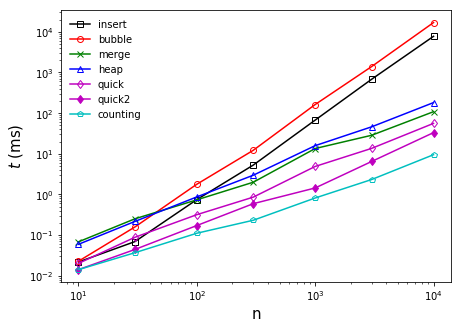

In [50]:
plt.figure(figsize=(7,5))
plt.xlabel('n', fontsize=15)
plt.ylabel('$t$ (ms)', fontsize=15)

plt.plot(nlist,t1, 'ks-', mfc='none')
plt.plot(nlist,t2, 'ro-', mfc='none')
plt.plot(nlist,t3, 'gx-')
plt.plot(nlist,t4, 'b^-', mfc='none')
plt.plot(nlist,t5, 'md-', mfc='none')
plt.plot(nlist,t6, 'md-')
plt.plot(nlist,t7, 'cp-', mfc='none')



plt.xscale('log')
plt.yscale('log')

plt.legend(['insert', 'bubble', 'merge', 'heap', 'quick', 'quick2', 'counting'],frameon=False)
#plt.xlim(0,1)
#plt.ylim(0,1)

plt.show()

In [25]:
sum(dX)

0